# <div align="center">Dynamic Documents - Jupyter</div>
## <div align="center">Part 2 - Stata</div>
## <div align="center">Data Science Tools Workshop</div>

### <div align="center">Fabien Forge</div>

#### <div align="center">15/10/2021</div>

In [1]:
#!pip install stata-setup

* You can either create a dedicated **[Kernel](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)** (see [stata_kernel](https://kylebarron.dev/stata_kernel/getting_started/) for any Stata)

* Or call you favorite language from a Python session (see [IPyStata](https://github.com/TiesdeKok/ipystata) for Stata<17 or [Stata-Setup](https://www.stata.com/new-in-stata/jupyter-notebooks/))

In [2]:
import stata_setup
stata_setup.config("/Applications/Stata 17", "se")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user compute server, expiring 30 Jun 2022
Serial number: 401709328560
  Licensed to: Fabien Forge
               McGill

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


## Call Stata using magic commands

The stata magic is used to execute Stata commands in an IPython environment. In a notebook cell, we put Stata commands underneath the `%%stata` cell magic to direct the cell to call Stata. The following commands load the auto dataset and summarize the mpg variable. The Stata output is displayed underneath the cell.

In [3]:
%%stata 
sysuse auto, clear

summarize mpg


. sysuse auto, clear
(1978 automobile data)

. 
. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. 


You can then do whatever Stata can

In [4]:
%%stata

ds


. 
. ds
make          rep78         weight        displacement
price         headroom      length        gear_ratio
mpg           trunk         turn          foreign

. 


Stata's graphs can also be displayed in the IPython environment. Here we create a scatterplot of car mileage against price by using the `%stata` line magic.



Hi


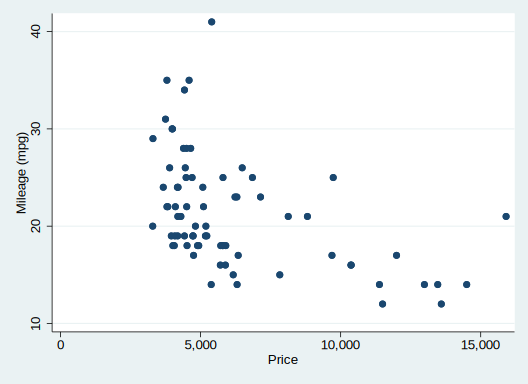

In [5]:
print("Hi")
%stata scatter mpg price

Next, we load Python data into Stata, perform analyses in Stata, and then pass Stata returned results to Python for further analysis, using the Second National Health and Nutrition Examination Survey (NHANES II; McDowell et al. 1981).

NHANES II, a dataset concerning health and nutritional status of adults and children in the US, contains 10,351 observations and 58 variables and is stored in a CSV file called nhanes2.csv. Among hese variables is an indicator variable for hypertension (highbp) and the continuous variables age and weight.

We use pandas method read_csv() to read the data from the .csv file into a pandas dataframe named nhanes2.

In [6]:
import pandas as pd

nhanes2 = pd.read_csv("https://www.stata.com/python/pystata/misc/nhanes2.csv")

nhanes2

,sampl,strata,psu,region,smsa,location,houssiz,sex,race,age,...,region4,smsa1,smsa2,smsa3,rural,loglead,agegrp,highlead,bmi,highbp
0,1400,1,1,S,2,1,4,Male,White,54,...,0,0,1,0,0,NaN,50-59,NaN,20.495686,0
1,1401,1,1,S,2,1,6,Female,White,41,...,0,0,1,0,0,2.564949,40-49,lead<25,21.022337,0
2,1402,1,1,S,1,1,6,Female,Other,21,...,0,1,0,0,0,NaN,20-29,NaN,24.973860,0
3,1404,1,1,S,2,1,9,Female,White,63,...,0,0,1,0,0,NaN,60-69,NaN,35.728722,1
4,1405,1,1,S,1,1,3,Female,White,64,...,0,1,0,0,0,2.995732,60-69,lead<25,27.923803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,48760,32,2,MW,4,48,5,Female,White,35,...,0,0,0,1,1,NaN,30-39,NaN,20.355173,0
10347,48763,32,2,MW,4,48,2,Female,White,33,...,0,0,0,1,1,1.945910,30-39,lead<25,41.645557,1
10348,48764,32,2,MW,4,48,1,Female,White,60,...,0,0,0,1,0,NaN,60-69,NaN,35.626114,0
10349,48768,32,2,MW,4,48,1,Female,White,29,...,0,0,0,1,0,NaN,20-29,NaN,19.204464,0


We load the dataframe into Stata by specifying the -d argument of the `%%stata magic`, and then within Stata, we fit a logistic regression model using age, weight, and their interaction as predictors of the probability of hypertension. 

We also push Stata's estimation results displayed by ereturn list, including the coefficient vector e(b) and variance–covariance matrix e(V), into a Python dictionary called myeret by specifying the -eret argument.

In [7]:
%%stata -d nhanes2 -eret myeret

logistic highbp c.age##c.weight

ereturn list


. 
. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
----------------------------------------------

We can access e(b) and e(V) by typing myeret['e(b)'] and myeret['e(V)'], respectively, in Python. They are stored in NumPy arrays.

In [8]:
myeret['e(b)']

array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
        -8.50485078e+00]])

In [9]:
myeret['e(V)']

array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
        -2.69423163e-03],
       [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
        -1.94299575e-03],
       [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
         3.50377699e-05],
       [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
         1.50887842e-01]])

We use [margins](https://www.stata.com/manuals/rmargins.pdf) and [marginsplot](https://www.stata.com/manuals/rmarginsplot.pdf) to graph predictions over age, which more clearly illustrates the relationship between age and the probability of hypertension.


. 
. quietly margins, at(age=(20(10)80))

. 
. marginsplot

Variables that uniquely identify margins: age

. 


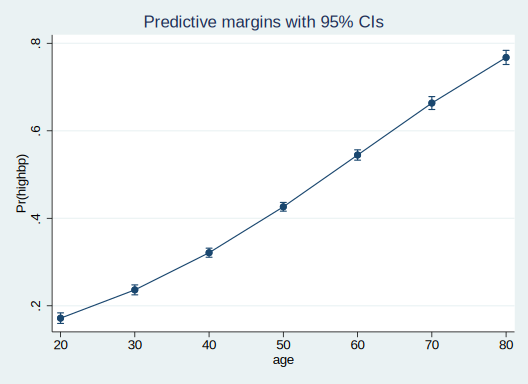

In [10]:
%%stata

quietly margins, at(age=(20(10)80))

marginsplot

You can pass a data in memory in Stata to Python (Pandas) using -doutd

In [11]:
%%stata -doutd df

ds


. 
. ds
sampl     race      hdresult  sizplace  copper    hsiz1     region4   bmi
strata    age       hgb       finalwgt  porphyrn  hsiz2     smsa1     highbp
psu       height    hct       leadwt    lead      hsiz3     smsa2
region    weight    tibc      corpuscl  female    hsiz4     smsa3
smsa      bpsystol  iron      trnsfern  black     hsiz5     rural
location  bpdiast   hlthstat  albumin   orace     region1   loglead
houssiz   tcresult  heartatk  vitaminc  fhtatk    region2   agegrp
sex       tgresult  diabetes  zinc      hsizgp    region3   highlead

. 


show the head of `df`

In [12]:
df.head()

,sampl,strata,psu,region,smsa,location,houssiz,sex,race,age,...,region4,smsa1,smsa2,smsa3,rural,loglead,agegrp,highlead,bmi,highbp
0,1400,1,1,S,2,1,4,Male,White,54,...,0,0,1,0,0,8.988466e+307,50-59,nan,20.495686,0
1,1401,1,1,S,2,1,6,Female,White,41,...,0,0,1,0,0,2.564949e+00,40-49,lead<25,21.022337,0
2,1402,1,1,S,1,1,6,Female,Other,21,...,0,1,0,0,0,8.988466e+307,20-29,nan,24.973860,0
3,1404,1,1,S,2,1,9,Female,White,63,...,0,0,1,0,0,8.988466e+307,60-69,nan,35.728722,1
4,1405,1,1,S,1,1,3,Female,White,64,...,0,1,0,0,0,2.995732e+00,60-69,lead<25,27.923803,0


You can also do this without the `%%stata` magic by using `pystata`

import also `seaborn` and `numpy`

In [13]:
from pystata import stata
import seaborn as sns
import numpy as np

Create a dataframe from the columns `age`, `weight` and `bmi` in the data currently in memory in Stata

In [14]:
df2 = stata.pdataframe_from_data(var="age weight bmi")

df2.head()

,age,weight,bmi
0,54,62.480000,20.495686
1,41,48.759998,21.022337
2,21,67.250000,24.973860
3,63,94.459999,35.728722
4,64,74.279999,27.923803


Plot the relationship

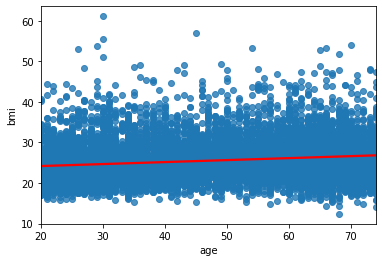

In [22]:
sns.regplot(x="age", y="bmi", line_kws={"color": "red"}, data=df2);


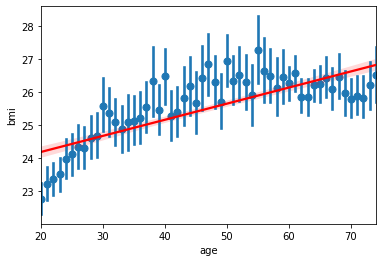

In [23]:
sns.regplot(x="age", y="bmi",  line_kws={"color": "red"}, x_estimator=np.mean, data=df2);

You can also pass a `Pandas` dataframe to `Stata` in order to say run regressions

In [17]:
stata.pdataframe_to_data(nhanes2, force=True)

stata.run('logistic highbp c.age##c.weight')


Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
------------------------------------------------------------------------------
Note:

Then we use the get_ereturn() method to store the e() results returned by the logistic command in Python as a dictionary named myeret2 and display e(b) and e(V) within it.

In [18]:
myeret2 = stata.get_ereturn()

myeret2['e(b)'], myeret2['e(V)']

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))

You can even run entire do files

In [19]:
stata.run('''
logistic highbp c.age##c.weight

ereturn list
''')


. 
. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
----------------------------------------------

Or call dofiles


. 
. do reg_nhanes2

. // Small piece of code
. 
. use ./../../Data/nhanes2.dta,clear

. 
. 
. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .000078

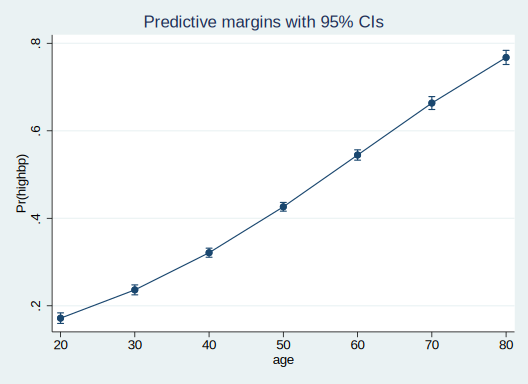

In [20]:
stata.run('''
do reg_nhanes2
''')